# 주성분분석(PCA) 적용하기

## 해결하고 싶었던 문제
* 배경 : 유저리서치 진행중 사용자별 목적(쇼핑, 성분, 혜택) 이 존재하는것을 확인 할 수 있었음
* 문제 : 위 가설을 데이터로 사용자의 액션(기능)을 기반으로 몇개의 축(목적)으로 분리 또는 축약하고 싶었음

## 방법 모색
* 차원축소 : 비슷한 변수를 묶는 방법
    * PCA(주성분분석) : 변수의 요약
    * FA(인자분석) : 잠재변수 찾기
* 군집화 : 비슷한 케이스를 묶는 방법 $\rightarrow$ 각각의 군집으로부터 특징을 뽑아냄 

* 고려사항
    * 기능의 조합이 너무 많기때문에 정보를 일부 잃더라고 차원을 축소해야함(3~4차원)
    * 이때 차원의 축소는 변수를 선택하는 방법이 아닌 기능의 조합들로 표현되어야함

## PCA
### 개념
* 정의 : 변수들의 **선형결합**을 통해 차원을 축소하는 방법

#### 2차원 예제

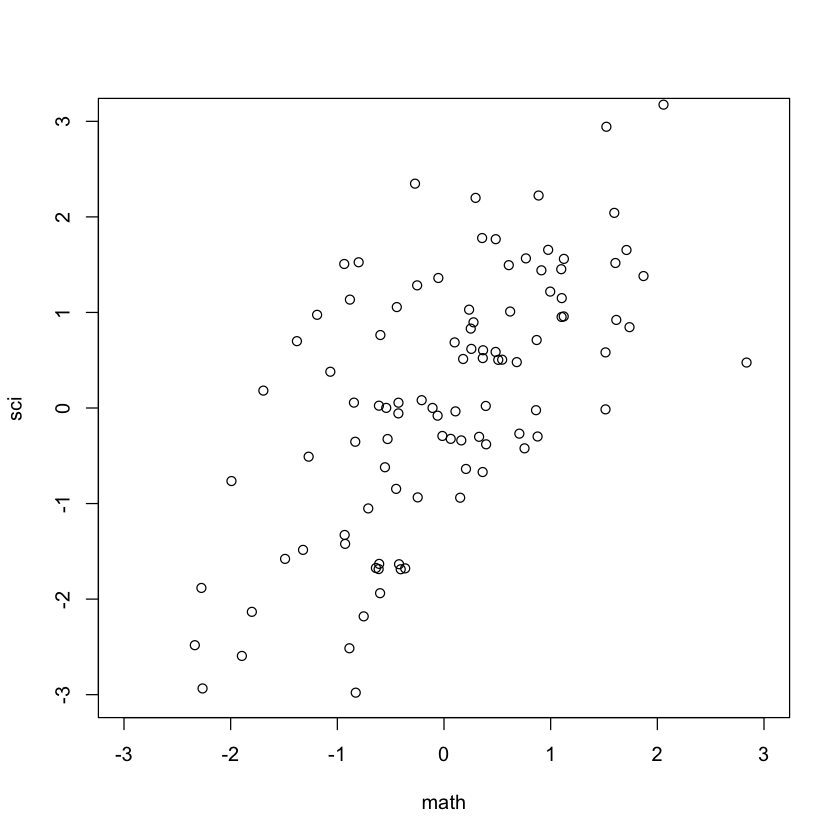

In [330]:
math<-rnorm(100)
noise1<-rnorm(100)
sci<-math+noise1
#sci<-math+0.1*noise1
plot(math,sci,xlim=c(-3,3),ylim=c(-3,3))

In [516]:
x<-data.frame(math,sci)
pca_fit<-principal(x, nfactors=2,rotate="none",normalize=FALSE)
pca_fit

Principal Components Analysis
Call: principal(r = x, nfactors = 2, rotate = "none", normalize = FALSE)
Standardized loadings (pattern matrix) based upon correlation matrix
      PC1   PC2 h2      u2 com
math 0.91 -0.42  1 2.2e-16 1.4
sci  0.91  0.42  1 2.2e-16 1.4

                       PC1  PC2
SS loadings           1.64 0.36
Proportion Var        0.82 0.18
Cumulative Var        0.82 1.00
Proportion Explained  0.82 0.18
Cumulative Proportion 0.82 1.00

Mean item complexity =  1.4
Test of the hypothesis that 2 components are sufficient.

The root mean square of the residuals (RMSR) is  0 
 with the empirical chi square  0  with prob <  NA 

Fit based upon off diagonal values = 1

> Proportion Explained : 분산 설명 비율

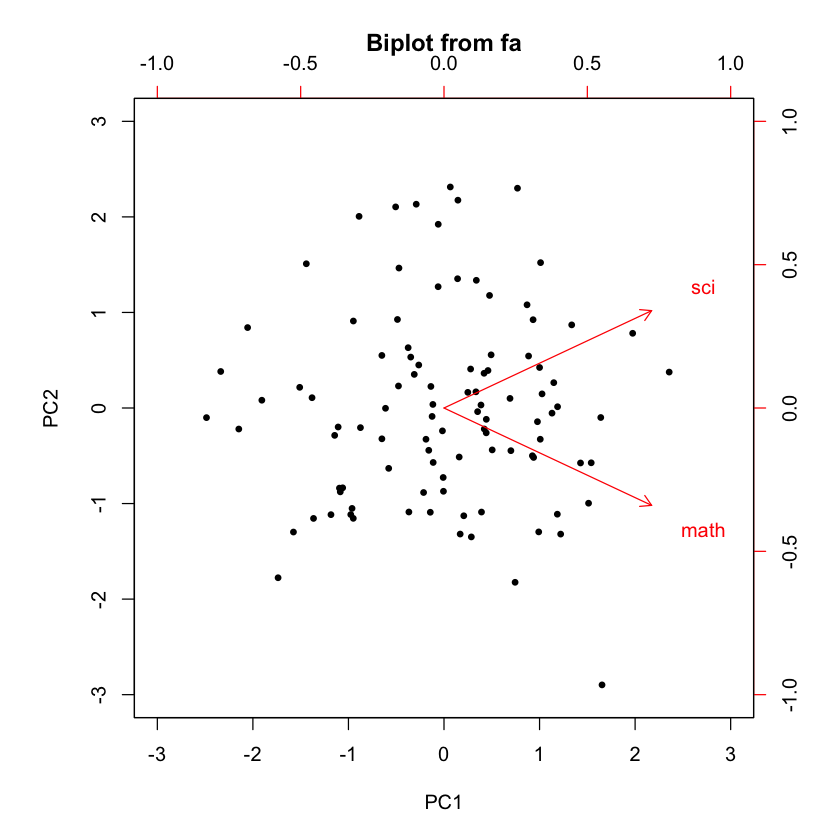

In [515]:
biplot(pca_fit)

> 그래프 해석

* 각도
    * 사이각이 작을 수록 유사함
* 길이
    * 영향도
* 점
    * 데이터 ~ ex) math에 가까운 데이터는 math점수가 상대적으로 높음


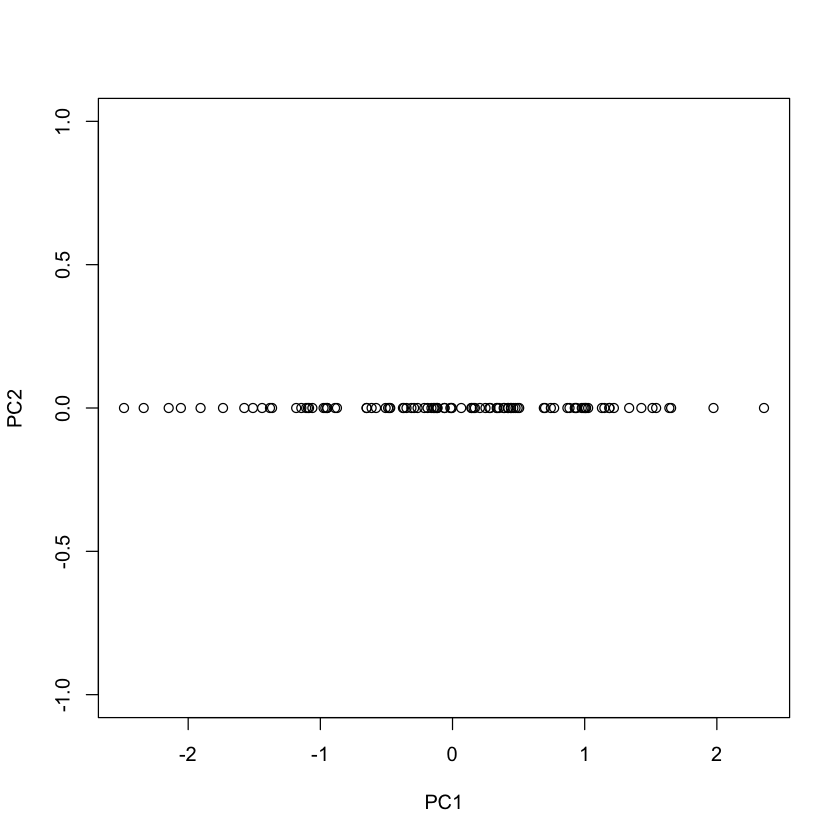

In [513]:
plot(cbind(pca_fit$score[,1],0),xlab='PC1',ylab='PC2')

>주성분 점수로 차원을 축소

#### 4차원 예제


Loadings:
     PC1    PC2   
math  0.496  0.760
sci   0.529  0.732
kor   0.759 -0.524
eng   0.797 -0.460

                 PC1   PC2
SS loadings    1.737 1.600
Proportion Var 0.434 0.400
Cumulative Var 0.434 0.834

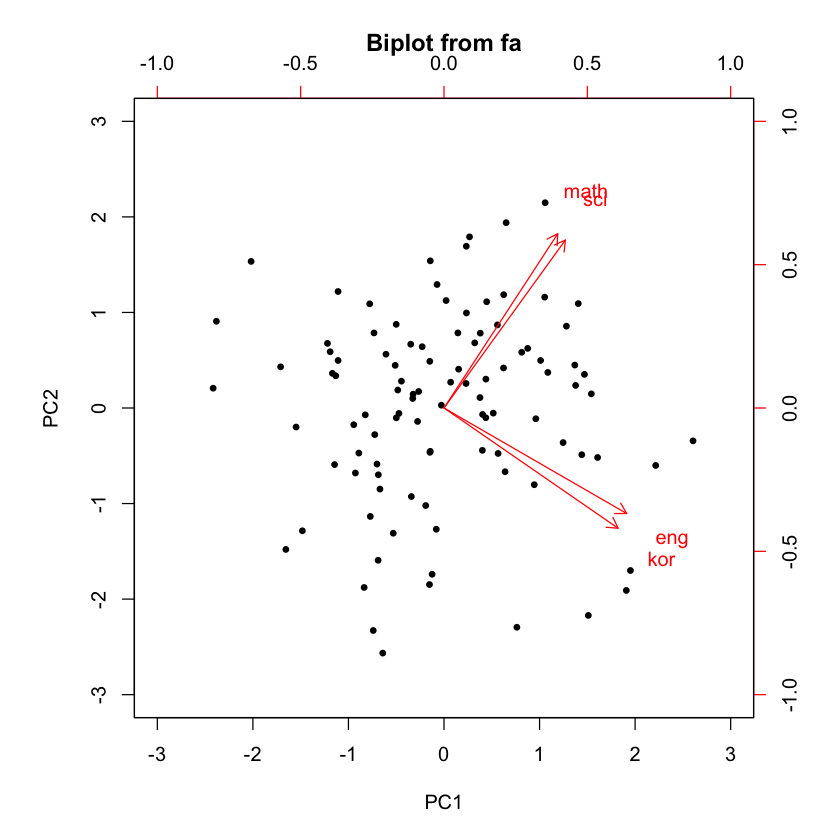

In [500]:
kor<-rnorm(100)
noise2<-rnorm(100)
eng<-kor+noise2

x<-data.frame(math,sci,kor,eng)
#pca_fit <- prcomp(x)
pca_fit <- principal(x, nfactors=2,rotate="none")
pca_fit$loading
biplot(pca_fit)

> 회전

* *Varimax(배리멕스)* : 분산의 극대화하는 직교 회전
* 각 주성분들이 로딩이 구분이 잘됨 = 해석이 편함


Loadings:
     RC1    RC2   
math         0.907
sci          0.903
kor   0.922       
eng   0.917       

                 RC1   RC2
SS loadings    1.693 1.644
Proportion Var 0.423 0.411
Cumulative Var 0.423 0.834

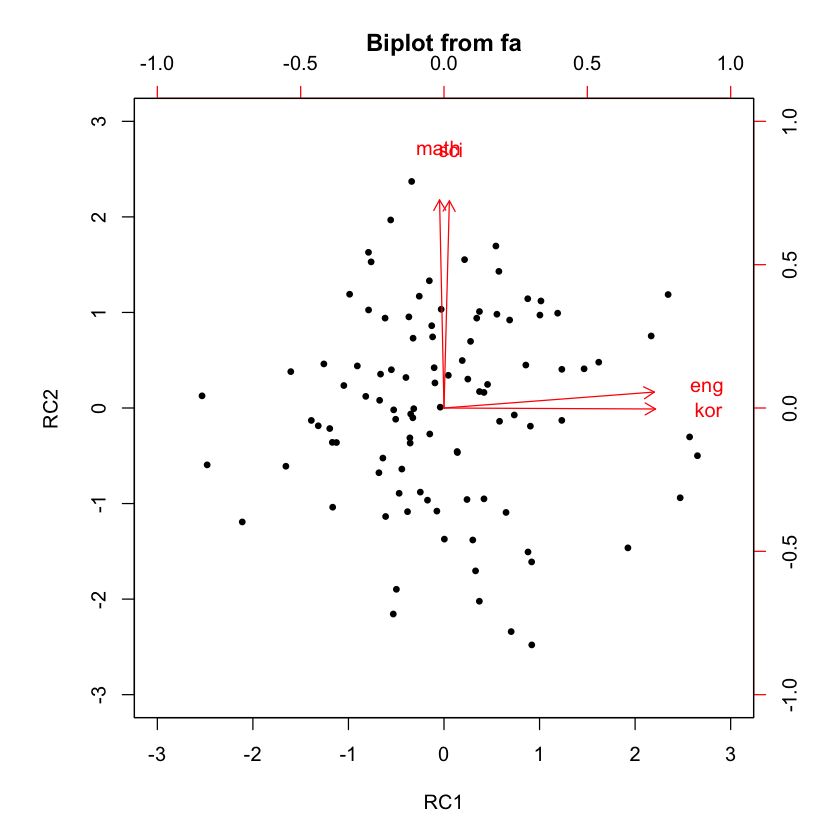

In [501]:
pca_fit_rotated <- principal(x, nfactors=2,rotate="varimax")
pca_fit_rotated$loading
biplot(pca_fit_rotated)

#### 주의
* 아웃라이어 : 축을 찾기때문에 아웃라이어로 영향을 크게 받음

## PCA적용
* 핵심 기능을 선택(14개의 기능)
* 사용자별 기능별 경험수를 집계
* 위 데이터로 PCA진행
* 50% 분산을 설명하는 4개의 주성분으로 축약
* 주성분에 대한 해석이 편하도록 회전을 취함
* 각각의 주성분의 로딩값으로 주성분의 특징을 파